In [206]:
import numpy as np

In [207]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [208]:
data = np.load("./datasets/mnist_train_small.npy")

In [209]:
data

array([[5, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [210]:
data

array([[5, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [211]:
data.size

15699215

In [212]:
data.shape

(19999, 785)

In [213]:
x = data[:,1:]

In [214]:
y = data[:,0]

In [215]:
x.shape , y.shape

((19999, 784), (19999,))

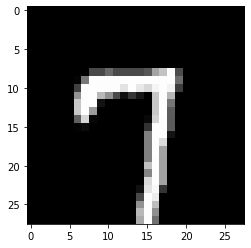

In [216]:
plt.imshow(x[564].reshape(28,28), cmap = 'gray')

In [217]:
y[7]

5

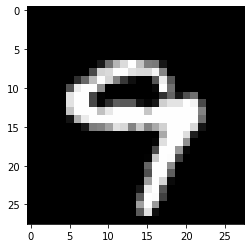

In [218]:
plt.imshow(x[2].reshape(28,28), cmap = 'gray')

In [219]:
y[2]

9

In [220]:
X,Y = make_blobs(n_samples=100,centers = 3 , random_state = 42)

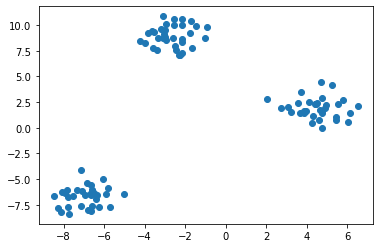

In [221]:
plt.scatter(X[:,0],X[:,1] )

In [222]:
X[:5] , Y[:5]

(array([[-7.72642091, -8.39495682],
        [ 5.45339605,  0.74230537],
        [-2.97867201,  9.55684617],
        [ 6.04267315,  0.57131862],
        [-6.52183983, -6.31932507]]),
 array([2, 1, 0, 1, 2]))

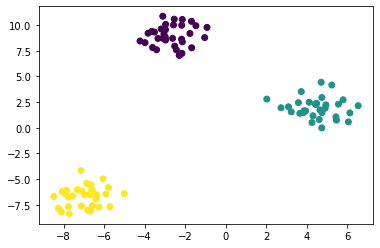

In [223]:
plt.scatter(X[:,0],X[:,1] ,c = Y)

In [224]:
x_train , x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [225]:
x_train.shape , y_train.shape

((13399, 784), (13399,))

In [226]:
x_test.shape , y_test.shape

((6600, 784), (6600,))

In [227]:
from sklearn.neighbors import KNeighborsClassifier

In [228]:
model = KNeighborsClassifier()

In [229]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [230]:
model.predict(x_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [231]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [232]:
#training the model happen in fit function
#plotting the point on the graph
#no work is happeining in the training model

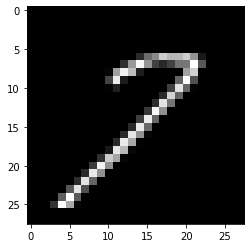

In [233]:
plt.imshow(x_test[0].reshape(28,28),cmap='gray')

In [234]:
model.score(x_test[:500],y_test[:500])

0.944

## Custom KNN

In [235]:
class CustomKNN:
    # constructor
    def __init__(self, n_neighbours=5):
        self.n_neighbours = n_neighbours
        
    # training function
    def fit(self, X, y):
        self._X = (X - X.mean()) / X.std() # standardisation
        self._y = y
    
    # predict point
    # given a single point, tell me which class it belongs to 
    def predict_point(self, point):
        # storing the dis of given 'point' from each point in training data
        list_dist = []
        
        # these points are from my training data
        for x_point, y_point in zip(self._X, self._y):
            dist_point = ((point - x_point) ** 2).sum()
            list_dist.append([dist_point, y_point])
        
        ## sorting the list according to the distance
        sorted_dist = sorted(list_dist)
        top_k = sorted_dist[:self.n_neighbours]
        
        # taking the count 
        items, counts = np.unique(np.array(top_k)[:, 1], return_counts=True)
        ans = items[np.argmax(counts)]
        return ans
            
    # predict
    # give me answer for each number in the array
    def predict(self, X):
        results = []
        X = (X - X.mean()) / X.std() 
        for point in X:
            results.append(self.predict_point(point))
        return np.array(results, dtype=int)
    
    # score to measure my accuracy
    def score(self, X, y):
        return sum(self.predict(X) == y) / len(y)

In [236]:
m2 = CustomKNN()

In [237]:
m2.fit(x_train,y_train)

In [238]:
m2.predict(x_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2])

In [239]:
m2.score(x_test[:100],y_test[:100])

0.95